# Tutorial básico para usar PUMA para películas delgadas

## 1. Introducción
(https://www.ime.usp.br/~egbirgin/puma/#remarks)

PUMA es un software para estimar las constantes ópticas \( n \), \( k \) y el espesor de películas delgadas usando datos de transmitancia y/o reflectancia.

Este tutorial explicara cómo preparar los datos, correr PUMA desde la consola y entender sus parámetros principales.

---

## 2. Preparar el archivo de datos

PUMA requiere un archivo de texto con este formato:

- Primera línea: número de observaciones (por ejemplo, 100)
- Luego, cada línea contiene la longitud de onda (en nm) y la transmitancia (o reflectancia) en fracciones (0 a 1).

Ejemplo de archivo llamado `muestra1-dat.txt`:





Para compilar PUMA para una pelicula:

gcc -O4 -lm puma.c -o puma.exe

# Cómo usar PUMA para estimar el espesor y constantes ópticas de una película delgada

Para correr PUMA en un sistema de una sola película, se tiene que escribir en la terminal el siguiente comando:



```bash
puma FNAME NLAYERS SLAYER SUBSTRATE DATATYPE NOBS LAMBDAmin LAMBDAmax maxIT QUAD INIT THICKNESSmin THICKNESSmax THICKNESSstep INFLEmin INFLEmax INFLEstep N0ini N0fin N0step NFini NFfin NFstep K0ini K0fin K0step


donde las palabras en mayúsculas son parámetros que se describen a continuación:

- **FNAME**: nombre de la película que se está estudiando (sin espacios).  
  El archivo de entrada debe llamarse `FNAME-dat.txt`.  
  El archivo de salida será creado automáticamente como `FNAME-inf.txt`.

- **Formato del archivo de entrada** (`FNAME-dat.txt`):
  - La primera línea contiene el número de observaciones. Por ejemplo, si tienes 100 observaciones, el archivo tendrá 101 líneas.
  - Desde la segunda línea hasta la última, cada línea debe contener la longitud de onda y la transmitancia (o reflectancia o ambas). Esto significa que cada línea debe tener 2 o 3 números.
  - Los datos de transmitancia o reflectancia deben estar en fracciones, es decir, valores entre 0 y 1.  
    Si tus datos están en porcentaje (0 a 100), divídelos entre 100.

- **NLAYERS**: número total de capas del sistema (películas, substrato y las capas de aire inicial y final).  

- **SLAYER**: número de la capa que corresponde al substrato.  
  Para un sistema con: aire (capa 0), película (1), substrato (2) y aire (3), usa `SLAYER = 2`.

- **SUBSTRATE**: número que describe el substrato:  
  - 10: vidrio  
  - 20: silicio cristalino  
  - 30: cuarzo cristalino  
  - 40: portaobjetos de vidrio 
  - 50: borosilicato

- **DATATYPE**: tipo de dato. Usa:  
  - `T` para transmitancia  
  - `R` para reflectancia  
  - `B` para ambos

- **NOBS**: número de puntos usados en la optimización.  
  Se interpolan puntos equiespaciados dentro del intervalo `[LAMBDAmin, LAMBDAmax]`.  
  Se recomienda usar 100 si no se tiene experiencia.

- **LAMBDAmin**: límite inferior del rango de longitudes de onda para estimar las constantes ópticas.  
  Debe ser mayor o igual al menor valor de longitud de onda en el archivo de datos.

- **LAMBDAmax**: límite superior del rango.  
  Debe ser menor o igual al mayor valor de longitud de onda en el archivo de datos.  
  Obligatorio: `LAMBDAmax >= LAMBDAmin`.

- **maxIT**: número máximo de iteraciones del optimizador.  
  Por cada combinación fija de grosor y punto de inflexión se resuelve un problema de optimización no lineal.  
  Se recomienda usar:  
  - 3000 para primer intento  
  - 5000 para segundo intento  
  - 50000 para último intento

- **QUAD**: error cuadrático del mejor ajuste hasta el momento.  
  Solo se guardan soluciones con error menor que este valor.  
  En el primer intento, se usa un número muy grande, como `1e+100`.  
  Cuando se usa una estimación previa para guiar un nuevo intento, puede que no se encuentre una mejor solución. En ese caso, el grosor retornado es cero.
  


- **INIT**: entero que elige entre hacer la estimación inicial o usar la previa como punto de partida.  
  - Usa `0` para estimación inicial.  
  - Usa `9` para usar la estimación previa como inicial.  
  - Si se usa `9`, se ignoran los parámetros de estimación inicial (`N0ini`, `N0fin`, `N0step`, `NFini`, `NFfin`, `NFstep`, `K0ini`, `K0fin`, `K0step`).

- **THICKNESSmin**: límite inferior para el grosor de prueba.  
  - Junto con `THICKNESSmax` define el intervalo en que se busca el grosor real.  
  - Se necesita algún conocimiento previo para fijar este rango.

- **THICKNESSmax**: límite superior para el grosor de prueba.  
  - Debe cumplirse `THICKNESSmax >= THICKNESSmin`.  
  - Si `THICKNESSmax = THICKNESSmin`, entonces se asume que el grosor es conocido y solo se estiman las constantes ópticas. En este caso, `THICKNESSstep` se ignora.

- **THICKNESSstep**: paso para barrer los valores de grosor en el intervalo definido.

Los valores de grosor probados son:

$$
\text{THICKNESS} = \text{THICKNESSmin} + w \times \text{THICKNESSstep}, \quad w=0,1,2,...
$$

- **INFLEmin**: límite inferior del punto de inflexión del coeficiente de atenuación.  
  - En PUMA, el coeficiente de atenuación se aproxima por una función cóncava en $[\text{LAMBDAmin}, \text{INFLEPOINT}]$ y convexa en $[\text{INFLEPOINT}, \text{LAMBDAmax}]$.  
  - Define junto con `INFLEmax` el rango donde se busca ese punto de inflexión.  
  - Si no se tiene idea, poner `INFLEmin = LAMBDAmin`.

- **INFLEmax**: límite superior para el punto de inflexión.  
  - Debe cumplirse `INFLEmax >= INFLEmin`.  
  - Si no se sabe, pon `INFLEmax = LAMBDAmax`.  
  - Si no se sabe el punto exacto, poner `INFLEmax = INFLEmin` y el paso se ignora.

- **INFLEstep**: paso para barrer valores del punto de inflexión dentro del rango.

Los valores probados son:

$$
\text{INFLEPOINT} = \text{INFLEmin} + w \times \text{INFLEstep}, \quad w=0,1,2,...
$$

- **N0ini, N0fin, N0step, NFini, NFfin, NFstep**: parámetros para la estimación inicial del índice de refracción \( n \).

  La estimación inicial de \( n(\lambda) \) se hace con funciones lineales estrictamente decrecientes que van de:

  - $ N_0 $ en $\lambda = \text{LAMBDAmin}$, que varía entre `N0ini` y `N0fin` con paso `N0step`,  
  - a $ N_F$ en $\lambda = \text{LAMBDAmax}$, que varía entre `NFini` y `NFfin` con paso `NFstep`.

  Esto significa que las funciones iniciales son líneas que pasan por los pares:

$$
(\text{LAMBDAmin}, N_0), \quad (\text{LAMBDAmax}, N_F)
$$

con

$$
N_0 = \text{N0ini} + u \times \text{N0step}, \quad u = 0,1,2,...
$$

$$
N_F = \text{NFini} + v \times \text{NFstep}, \quad v = 0,1,2,...
$$

donde $ N_0 \in [\text{N0ini}, \text{N0fin}] $, $ N_F \in [\text{NFini}, \text{NFfin}] $, y $ N_0 > N_F $.


- Se necesita un conocimiento a priori del índice de refracción del material para fijar estos parámetros.

- **K0ini, K0fin, K0step**: estimaciones iniciales para el coeficiente de atenuación \( k \).  

  En este caso se usa una función lineal a tramos, con valores:  
  - $ K_0 $ en $\lambda = \text{LAMBDAmin}$,  
  - $ 0.1 \times K_0 $ en $\lambda = \text{LAMBDAmin} + 0.2 \times (\text{LAMBDAmax} - \text{LAMBDAmin})$,  
  - $ K_0 $ en $\lambda = \text{LAMBDAmax}$,  

  donde $ K_0 $ varía dentro del intervalo $[K0ini, K0fin]$ como:

  $$
  K_0 = K0ini + z \times K0step, \quad z = 0,1,2,...
  $$



# Sustratos soportados por PuMA

En PuMA, el parámetro `SUBSTRATE` define el índice de refracción de la capa base de la película según el material. Cada ID corresponde a un material específico y su rango de transparencia.

| ID | Material                      | Rango de λ (nm) |
|----|-------------------------------|----------------|
| 10 | Vidrio genérico                | 350 – 2000     |
| 20 | Silicio cristalino             | 1250 – 2600    |
| 30 | Cuarzo cristalino              | 200 – 1500     |
| 40 | Vidrio para portaobjetos (glass slides)      | 360 – 800      |
| 50 | Borosilicato                   | 300 – 2600     |
| 60 | Cuarzo amorfo                  | 200 – 1500     |

# Ejemplo para sistema de una sola película

Como se explicó antes, se puede correr PUMA haciendo una estimación inicial o usando una estimación previa como punto de partida, llamando a PUMA una, dos, tres o más veces según sea necesario. Esta flexibilidad combinada con una buena elección de parámetros de entrada da un grado alto de control.

Generalmente, con tres llamadas alcanza. El procedimiento recomendado es:

1. En el primer intento, se elige un intervalo para los grosores de prueba alrededor de algún valor conocido.  
   Se fija el paso de grosor.  
   Se elige el intervalo para el punto de inflexión del coeficiente de atenuación igual al intervalo del espectro.

2. En el segundo intento, se estrecha el intervalo de grosores alrededor del grosor recuperado previamente.  
   Se disminuye el paso de grosor.  
   Y se hace lo mismo para el punto de inflexión del coeficiente de atenuación.  
   Además, se incrementa el número máximo de iteraciones.

3. En el tercer intento, se fija el grosor como el recuperado anteriormente.  
   Y se hace lo mismo para el punto de inflexión.  
   Y se vuelve a aumentar el máximo de iteraciones.

---

## Ejemplo práctico con la película "gedanken film A"

(Para reproducir este ejemplo, copiá el archivo de datos `sigl0097t-dat.txt` al mismo directorio donde está instalado PUMA).

### Primera llamada

El comando para el primer intento es:



```bash
.\puma.exe sigl0097t 4 2 10 T 100 0540 1530 3000 1e+100 0 0010 0200 10 0540 1530 100 3 5 1 3 5 1 0.10 0.10 0.05 > results.txt



Lo que se observara en el output es algo con esta estructura:

`λ_min   Espesor   m1   m2   ΔK0   error   [opcional !!!]`


Donde en este ejemplo, se puede observar algo como:

540.00 → Longitud de onda mínima usada en ese cálculo (en nm).

10.00 → Espesor de la película (en nm o en la unidad que definiste en el input).

3.00 → Primer índice de interferencia (m1), asociado al mínimo/máximo de interferencia más bajo.

3.00 → Segundo índice de interferencia (m2), asociado a otro punto característico.

0.10 → Paso de variación de K0 (coeficiente de extinción inicial) en la búsqueda.

4.151371e+00 → Error o función objetivo (fitness) que el algoritmo está minimizando.

!!! → Marcador que indica que esa combinación de parámetros está fuera de un rango físico razonable o que el ajuste no cumple alguna condición interna del programa (por ejemplo, índice de refracción < 1 o K negativo).

## Segunda llamada (Second Call)

Con los resultados de la primera corrida:
- Espesor recuperado: **100 nm**
- Punto de inflexión recuperado: **540 nm**
- Error cuadrático: **6.342857e-03** *(puede variar levemente entre máquinas)*





```bash
.\puma.exe sigl0097t 4 2 10 T 100 0540 1530 5000 6.342857e-03 9 0050 0150 01 0540 0540 100 > secondcall_results.txt


> Nota: en esta segunda llamada **se omiten** los parámetros de estimación inicial de \(n\) y \(k\):  
> `N0ini N0fin N0step NFini NFfin NFstep K0ini K0fin K0step`.

### Qué cambió respecto a la primera llamada???

- **MAXIT**: de `3000` → `5000` (más iteraciones).
- **QUAD**: ahora es el **error cuadrático previo** `6.342857e-03`.  
  Solo se guardan soluciones con error **menor** a este valor.
- **INIT**: `9` (usa las constantes ópticas estimadas previamente como **initial guess**).
- **THICKNESSmin–max–step**: de `10–200–10` → a un rango centrado en **100 nm**: `50–150–1`.  
  Rango más estrecho y **paso** más fino.
- **INFLEmin–max–step**: se **fija** el punto de inflexión en `540`: `540–540` (el `step` se ignora).

### Resultado esperado
- Espesor recuperado cercano a **97 nm**.
- Se actualizan $ n(\lambda) $ y $ k(\lambda) $ usando las constantes previas como guía, refinando el ajuste.



# Tercera Corrida en PuMA (Third Call)

En la **third call**, el objetivo ya no es explorar un rango amplio como al inicio, sino **refinar al máximo** los parámetros óptimos obtenidos en las corridas previas.





```bash
.\puma.exe sigl0097t 4 2 10 T 100 0540 1530 50000 1.773782e-04 9 0097 0097 01 0540 0540 100

---
## Cambios clave respecto a la segunda corrida

1. **Fijar el grosor (Thickness)**
   - Se usa el valor más confiable encontrado antes: **97 nm**.
   - Ya no se buscan variaciones de espesor; toda la optimización se enfoca en $ n(\lambda) $ y $ k(\lambda) $.

2. **Usar el menor error cuadrático anterior**
   - Valor anterior: **1.773782e-04**.
   - Ahora, solo se aceptan soluciones con **error menor** a este valor.
   - Esto filtra las soluciones, exigiendo que las curvas calculadas sean casi idénticas a los datos experimentales.

3. **Aumentar el número de iteraciones**
   - De **5000** a **50000** para hacer un barrido más fino del espacio de parámetros.
   - Reduce el ruido numérico y mejora la precisión.

4. **Mantener el punto de inflexión fijo**
   - El inflection point sigue en **540 nm**, considerado confiable desde corridas previas.

---

## Resultado final

- El archivo de salida `sigl0097t-inf.txt` contendrá los valores finales de:
  - $ n(\lambda) $: índice de refracción
  - $ k(\lambda) $: coeficiente de extinción
- Estos valores corresponden a la **solución definitiva** para graficar y analizar.


## Probando con datos del ITO

In [25]:
# Script para cambiar un archivo .dat al formato que se necesita para PuMA
import numpy as np

# Nombre del archivo original y del nuevo archivo
input_file = "ITO_data_curated_350-1000.txt"  # cambiar esto al nombre del archivo
output_file = "ITO_data_curated_350-1000.txt"

# Lee los datos (dos columnas: longitud de onda y transmitancia, por ejemplo)
data = np.loadtxt(input_file)

# Reemplaza los valores negativos de transmitancia por un valor muy pequeño positivo, descomentar solo si no quiere quitar los negativos
#data[:, 1] = np.where(data[:, 1] < 0, 1e-10, data[:, 1])

# Elimina las filas con transmitancia negativa
data = data[data[:, 1] >= 0]

# Normaliza la transmitancia entre 0 y 1, descomentar solo si no esta normalizado
#data[:, 1] = data[:, 1] / 100.0

# Ordena las filas por longitud de onda (columna 0)
orden = np.argsort(data[:, 0])  # índices ordenados por longitud de onda
data = data[orden]              # reordena ambas columnas como pares

# Agregar la primera fila con el número de observaciones
n_obs = data.shape[0]
with open(output_file, "w") as f:
    f.write(f"{n_obs}\n")
    np.savetxt(f, data, fmt="%.3e %.3e")  # Guardar en notación científica

print(f"Archivo listo para PUMA: {output_file}")


Archivo listo para PUMA: ITO_data_curated_350-1000.txt


```bash
./puma.exe ITO_data_curated 4 2 70 T 100 0300 1100 3000 1e+100 0 0140 0170 1 0300 1100 50 1.6 2.4 0.05 1.5 2.2 0.05 0.00 0.40 0.05 > ITO_firstcall.txt





## Parámetros First Call

| Parámetro | Valor | Significado |
|-----------|-------|------------|
| `FNAME` | ITO_data_curated | Archivo de entrada que contiene los datos del film. |
| `NLAYERS` | 4 | Número total de capas: aire inicial + film + sustrato + aire final. |
| `SLAYER` | 2 | Número de la capa de interés: 0 → aire inicial, 1 → film, 2 → sustrato, 3 → aire final. |
| `SUBSTRATE` | 70 | Código del sustrato, en este caso el soda lime glass que agregué. |
| `DATATYPE` | T | Tipo de medida: `T` para transmitancia, `R` para reflectancia o `B` para ambos. |
| `NOBS` | 100 | Número de observaciones o puntos de longitud de onda. |
| `LAMBDAmin` | 300 | Longitud de onda mínima (nm) considerada para ajuste. |
| `LAMBDAmax` | 1100 | Longitud de onda máxima (nm) considerada para ajuste. |
| `MAXIT` | 3000 | Número máximo de iteraciones para el ajuste (lo mande en cluster, para local reducir el numero). |
| `QUAD` | 1e+100 | Cota máxima del error cuadrático (muy alta para no limitar). |
| `INIT` | 0 | Se realiza estimación inicial. |
| `THICKNESSmin` | 140 | Espesor mínimo de la capa (nm) para el ajuste. |
| `THICKNESSmax` | 170 | Espesor máximo de la capa (nm) para el ajuste. |
| `THICKNESSstep` | 1 | Paso de espesor para el barrido de ajuste. |
| `INFLEmin` | 300 | Longitud de onda mínima para buscar punto de inflexión. |
| `INFLEmax` | 1100 | Longitud de onda máxima para punto de inflexión. |
| `INFLEstep` | 50 | Paso en la búsqueda del punto de inflexión. |
| `N0ini` | 1.6 | Valor mínimo de índice de refracción de la capa inicial. |
| `N0fin` | 2.4 | Valor máximo de índice de refracción de la capa inicial. |
| `N0step` | 0.05 | Paso de n para barrido de ajuste. |
| `NFini` | 1.5 | Valor mínimo de índice de refracción de la capa final. |
| `NFfin` | 2.2 | Valor máximo de índice de refracción de la capa final. |
| `NFstep` | 0.05 | Paso de n de la capa final. |
| `K0ini` | 0.00 | Valor mínimo de coeficiente de absorción de la capa inicial. |
| `K0fin` | 0.40 | Valor máximo de coeficiente de absorción de la capa inicial. |
| `K0step` | 0.05 | Paso de κ para barrido de ajuste. |



Del first call, revisamos el -inf.txt y de ahí obtenemos el espesor estimado, punto de inflexión, y error cuadratico y mandamos a hacer el second call.
Inicialmente salió Espesor estimado = 166 nm, Punto de inflexión = 300 nm y Error cuadrático = 2.989977e-02
```bash
./puma.exe ITO_data_curated 4 2 70 T 100 0300 1100 5000 2.989977e-02 9 0120 0200 1 0300 0300 100 > ITO_secondcall.txt




## Parámetros Second Call:

| Parámetro | Valor | Explicación |
|-----------|-------|-------------|
| `FNAME` | ITO_data_curated | Nombre del archivo de datos que contiene la transmitancia medida. |
| `NLAYERS` | 4 | Número de capas (aire inicial + film + sustrato + aire final). |
| `SLAYER` | 2 | Índice de la capa a ajustar (la película es layer 1, sustrato layer 2). |
| `SUBSTRATE` | 10 | Identificador del sustrato usado (por ejemplo vidrio). |
| `DATATYPE` | T | Tipo de dato a ajustar: Transmittancia. |
| `NOBS` | 100 | Número de puntos de observación usados en el ajuste. |
| `LAMBDAmin` | 300 | Longitud de onda mínima en nm considerada para el ajuste. |
| `LAMBDAmax` | 1100 | Longitud de onda máxima en nm considerada para el ajuste. |
| `MAXIT` | 5000 | Número máximo de iteraciones del algoritmo de ajuste. |
| `QUAD` | 2.989977e-02| Error cuadrático obtenido en el first call, usado como referencia. |
| `INIT` | 9 | Indica que es un segundo call refinando los parámetros. |
| `THICKNESSmin` | 120 | Espesor mínimo de la película (nm) en este barrido. |
| `THICKNESSmax` | 200 | Espesor máximo de la película (nm). |
| `THICKNESSstep` | 1 | Paso para el barrido de espesor. |
| `INFLEmin` | 300 | Punto de inflexión mínimo para α(λ) (nm). |
| `INFLEmax` | 300 | Punto de inflexión máximo (igual al mínimo, es fijo). |
| `INFLEstep` | 100 | Paso para el barrido de puntos de inflexión (aquí no importa, ya que min=max). |


Ahora para el Third Call, obtuvimos anteriormente que Espesor estimado = 166 nm, Punto de inflexión = 300 nm y Error cuadrático = 2.989977e-02, vamos a relajar un poco el error, porque ya deporsi es muy bajo y le va a costar encontrar un mejor ajuste
```bash
./puma.exe ITO_data_curated 4 2 70 T 100 0300 1100 500000 3e-02 9 0165 0167 1 0295 0305 1 > ITO_thirdcall.txt


Parámetros Third Call:

| Parámetro | Valor | Explicación |
|-----------|-------|-------------|
| `FNAME` | ITO_data_curated | Nombre del archivo de datos que contiene la transmitancia medida. |
| `NLAYERS` | 4 | Número de capas (aire inicial + película + sustrato + aire final). |
| `SLAYER` | 2 | Índice de la capa a ajustar (la película es layer 1, sustrato layer 2). |
| `SUBSTRATE` | 70 | Identificador del sustrato usado (ej. vidrio ). |
| `DATATYPE` | T | Tipo de dato a ajustar: Transmittancia. |
| `NOBS` | 100 | Número de puntos de observación usados en el ajuste. |
| `LAMBDAmin` | 300 | Longitud de onda mínima en nm considerada para el ajuste. |
| `LAMBDAmax` | 1100 | Longitud de onda máxima en nm considerada para el ajuste. |
| `MAXIT` | 50000 | Número máximo de iteraciones del algoritmo de ajuste (muy alto para refinar la solución). |
| `QUAD` | 3e-02 | Error cuadrático obtenido del second call, usado como referencia. |
| `INIT` | 9 | Indica que es un tercer call refinando los parámetros anteriores. |
| `THICKNESSmin` | 165 | Espesor mínimo de la película (nm) en este barrido. |
| `THICKNESSmax` | 167 | Espesor máximo de la película (nm), aquí fijado. |
| `THICKNESSstep` | 100 | Paso para el barrido de espesor (irrelevante al ser min=max). |
| `INFLEmin` | 295 | Punto de inflexión mínimo para α(λ) (nm). |
| `INFLEmax` | 303 | Punto de inflexión máximo (fijo). |
| `INFLEstep` | 1 | Paso para el barrido de puntos de inflexión (irrelevante al ser min=max). |


Error relativo cuadrático promedio (RMSE): 0.17 %
Desviación porcentual promedio: 0.13 %


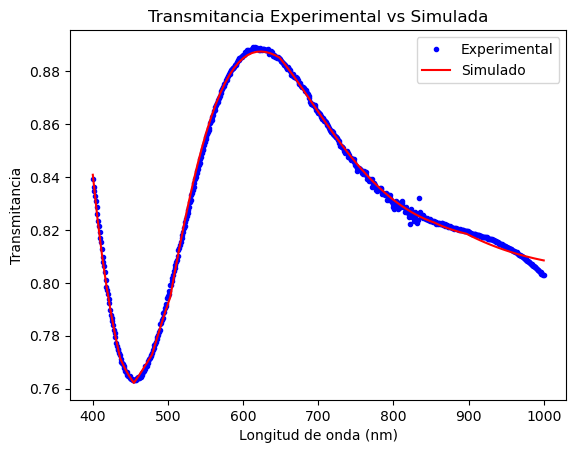

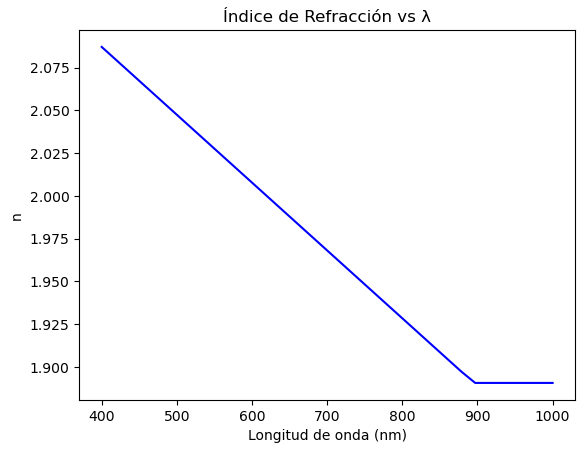

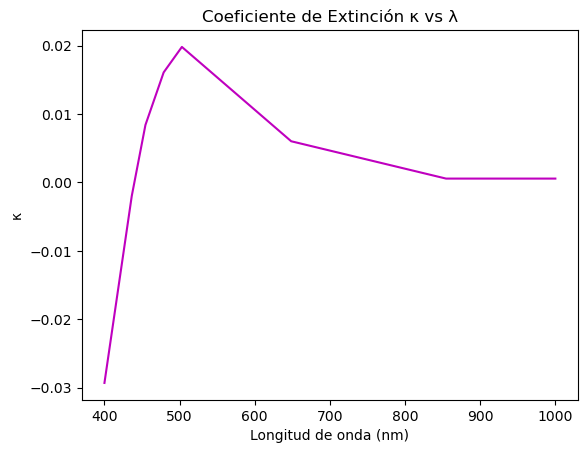

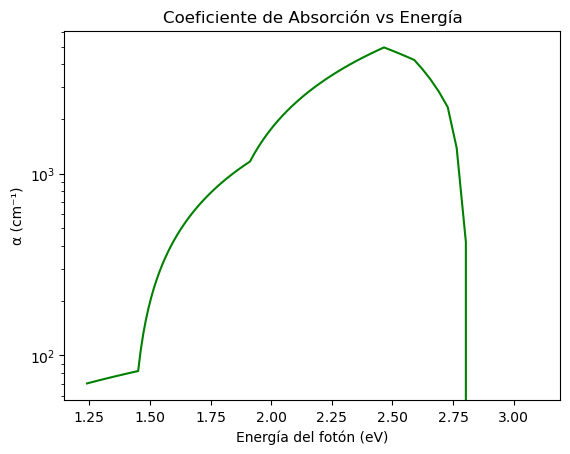

Gráficas guardadas como PNG


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

filename = "ITO_s70_400-1000.txt"
# === Detectar bloques de salida automáticamente ===
block1 = []  # λ, n, kappa
block2 = []  # λ, T simulada

with open(filename, "r") as f:
    for line in f:
        try:
            vals = list(map(float, line.split()))
            if len(vals) == 3:       # λ, n, kappa
                block1.append(vals)
            elif len(vals) == 2:     # λ, T simulada
                block2.append(vals)
        except:
            continue

block1 = np.array(block1)
block2 = np.array(block2)

# === Extraer variables ===
lambda1 = block1[:, 0]   # longitud de onda (nm)
n = block1[:, 1]         # índice de refracción
kappa = block1[:, 2]     # coeficiente de extinción

lambda2 = block2[:, 0]   # λ en nm
T_sim = block2[:, 1]     # transmitancia simulada

# === Cargar experimental (desde input original) ===
exp_data = np.loadtxt("ITO_data_curated_400-1000.txt", skiprows=1)
lambda_exp = exp_data[:, 0]
T_exp = exp_data[:, 1]

# === Calcular α vs Energía ===
h_c = 1240  # eV·nm
E = h_c / lambda1
alpha = 4 * np.pi * kappa / (lambda1 * 1e-7)  # cm^-1


# === Calcular error relativo cuadrático promedio ===

# === Interpolación de T_sim a puntos experimentales ===
interp_T = interp1d(lambda2, T_sim, kind='linear', fill_value="extrapolate")
T_sim_interp = interp_T(lambda_exp)

# === 1. Error relativo cuadrático promedio (RMSE relativo) ===
rel_error = np.sqrt(np.mean((T_sim_interp - T_exp)**2)) / np.mean(T_exp)
percent_error_rmse = rel_error * 100

# === 2. Desviación porcentual promedio (MAPE) ===
abs_percent_error = np.mean(np.abs(T_sim_interp - T_exp)/T_exp) * 100

print(f"Error relativo cuadrático promedio (RMSE): {percent_error_rmse:.2f} %")
print(f"Desviación porcentual promedio: {abs_percent_error:.2f} %")


# === 1. Transmitancia (experimental vs simulado) ===
plt.figure()
plt.plot(lambda_exp, T_exp, 'bo', markersize=3, label="Experimental")
plt.plot(lambda2, T_sim, 'r-', label="Simulado")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Transmitancia")
plt.title("Transmitancia Experimental vs Simulada")
plt.legend()
plt.savefig("T_exp_vs_sim.png", dpi=300)
plt.show()

# === 2. Índice de refracción n vs λ ===
plt.figure()
plt.plot(lambda1, n, 'b-')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("n")
plt.title("Índice de Refracción vs λ")
plt.savefig("n_vs_lambda.png", dpi=300)
plt.show()

# === 3. κ vs λ ===
plt.figure()
plt.plot(lambda1, kappa, 'm-')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("κ")
plt.title("Coeficiente de Extinción κ vs λ")
plt.savefig("kappa_vs_lambda.png", dpi=300)
plt.show()

# === 4. Coeficiente de absorción α vs Energía ===
plt.figure()
plt.plot(E, alpha, 'g-')
plt.yscale('log')
plt.xlabel("Energía del fotón (eV)")
plt.ylabel("α (cm⁻¹)")
plt.title("Coeficiente de Absorción vs Energía")
plt.savefig("alpha_vs_energy.png", dpi=300)
plt.show()

print("Gráficas guardadas como PNG")


In [2]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import interp1d

# === Archivos ===
filename_sim = "ITO_data_curated-inf.txt"
filename_exp = "ITO_data_curated_400-1000.txt"

# === Detectar bloques de salida automáticamente ===
block1, block2 = [], []

with open(filename_sim, "r") as f:
    for line in f:
        try:
            vals = list(map(float, line.split()))
            if len(vals) == 3:       # λ, n, kappa
                block1.append(vals)
            elif len(vals) == 2:     # λ, T simulada
                block2.append(vals)
        except:
            continue

block1 = np.array(block1)
block2 = np.array(block2)

# === Extraer variables ===
lambda1, n, kappa = block1[:,0], block1[:,1], block1[:,2]
lambda2, T_sim = block2[:,0], block2[:,1]

# === Cargar datos experimentales ===
exp_data = np.loadtxt(filename_exp, skiprows=1)
lambda_exp, T_exp = exp_data[:,0], exp_data[:,1]

# === Interpolación de T_sim a puntos experimentales ===
interp_T = interp1d(lambda2, T_sim, kind='linear', fill_value="extrapolate")
T_sim_interp = interp_T(lambda_exp)

# === Calcular errores ===
rel_error = np.sqrt(np.mean((T_sim_interp - T_exp)**2)) / np.mean(T_exp)
percent_error_rmse = rel_error * 100
abs_percent_error = np.mean(np.abs(T_sim_interp - T_exp)/T_exp) * 100

print(f"Error relativo cuadrático promedio (RMSE): {percent_error_rmse:.2f} %")
print(f"Desviación porcentual promedio (MAPE): {abs_percent_error:.2f} %")

# === Calcular α vs Energía ===
h_c = 1240  # eV·nm
E = h_c / lambda1
alpha = 4 * np.pi * kappa / (lambda1 * 1e-7)  # cm^-1

# === Función para guardar solo HTML ===
def save_plot_html(fig, fname_base):
    fig.write_html(f"{fname_base}.html")
    fig.show()

# === 1. Transmitancia con errores en la gráfica ===
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=lambda_exp, y=T_exp, mode="markers", name="Experimental"))
fig1.add_trace(go.Scatter(x=lambda2, y=T_sim, mode="lines", name="Simulado"))
fig1.add_annotation(
    text=f"RMSE: {percent_error_rmse:.2f} %, MAPE: {abs_percent_error:.2f} %",
    xref="paper", yref="paper",
    x=0.05, y=0.95, showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="rgba(255,255,255,0.7)",
    bordercolor="black",
    borderwidth=1
)
fig1.update_layout(title="Transmitancia Experimental vs Simulada",
                   xaxis_title="Longitud de onda (nm)",
                   yaxis_title="Transmitancia")
save_plot_html(fig1, "T_exp_vs_sim")

# === 2. Índice de refracción n vs λ ===
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=lambda1, y=n, mode="lines", name="n"))
fig2.update_layout(title="Índice de Refracción vs λ",
                   xaxis_title="Longitud de onda (nm)",
                   yaxis_title="n")
save_plot_html(fig2, "n_vs_lambda")

# === 3. κ vs λ ===
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=lambda1, y=kappa, mode="lines", name="κ"))
fig3.update_layout(title="Coeficiente de Extinción κ vs λ",
                   xaxis_title="Longitud de onda (nm)",
                   yaxis_title="κ")
save_plot_html(fig3, "kappa_vs_lambda")

# === 4. Coeficiente de absorción α vs Energía ===
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=E, y=alpha, mode="lines", name="α"))
fig4.update_yaxes(type="log")
fig4.update_layout(title="Coeficiente de Absorción vs Energía",
                   xaxis_title="Energía del fotón (eV)",
                   yaxis_title="α (cm⁻¹)")
save_plot_html(fig4, "alpha_vs_energy")

print("Gráficas guardadas como HTML con errores incluidos")


Error relativo cuadrático promedio (RMSE): 0.17 %
Desviación porcentual promedio (MAPE): 0.13 %


Gráficas guardadas como HTML con errores incluidos


In [27]:
import numpy as np
import glob
from scipy.interpolate import interp1d
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === Archivo experimental ===
filename_exp = "ITO_data_curated_400-1000.txt"
exp_data = np.loadtxt(filename_exp, skiprows=1)
lambda_exp, T_exp = exp_data[:,0], exp_data[:,1]

# === Archivos simulados ===
sim_files = glob.glob("ITO_s70_*.txt")
results = []

# Calcular errores
for f in sim_files:
    block1, block2 = [], []
    with open(f, "r") as file:
        for line in file:
            try:
                vals = list(map(float, line.split()))
                if len(vals) == 3:
                    block1.append(vals)
                elif len(vals) == 2:
                    block2.append(vals)
            except:
                continue

    block1 = np.array(block1)
    block2 = np.array(block2)

    if len(block2) == 0:
        continue

    lambda2, T_sim = block2[:,0], block2[:,1]
    interp_T = interp1d(lambda2, T_sim, kind='linear', fill_value="extrapolate")
    T_sim_interp = interp_T(lambda_exp)

    rmse = np.sqrt(np.mean((T_sim_interp - T_exp)**2)) / np.mean(T_exp) * 100
    mape = np.mean(np.abs(T_sim_interp - T_exp)/T_exp) * 100

    results.append((f, rmse, mape, lambda2, T_sim))

# Ordenar por RMSE
results.sort(key=lambda x: x[1])

# Paleta y estilos
colors = ["red", "blue", "green", "orange", "purple", "cyan"]
line_styles = ["solid", "dash", "dot", "dashdot", "longdash", "longdashdot"]

# Crear figura
fig = go.Figure()

# Curva experimental
fig.add_trace(go.Scatter(
    x=lambda_exp, y=T_exp,
    mode="markers",
    name="Experimental",
    marker=dict(size=8, color="black", symbol="circle")
))

# Top N simulaciones (max 6 para paleta)
top_N = min(3, len(results))
for i, (fname, rmse, mape, lambda2, T_sim) in enumerate(results[:top_N]):
    # Mejor simulación resaltada
    width = 4 if i == 0 else 2
    opacity = 1.0 if i == 0 else 0.6
    color = colors[i]

    fig.add_trace(go.Scatter(
        x=lambda2, y=T_sim,
        mode="lines",
        name=f"{fname} (RMSE={rmse:.2f}%, MAPE={mape:.2f}%)",
        line=dict(color=color, width=width, dash=line_styles[i]),
        opacity=opacity,
        hovertemplate=
            "λ: %{x} nm<br>T: %{y:.3f}<br>" +
            f"RMSE: {rmse:.2f}%<br>MAPE: {mape:.2f}%<extra></extra>"
    ))

# Layout interactivo
fig.update_layout(
    title="Overlay Experimental vs Top Simulaciones",
    xaxis_title="Longitud de onda (nm)",
    yaxis_title="Transmitancia",
    legend=dict(font=dict(size=12)),
    yaxis=dict(range=[0.7, 0.9]),
    xaxis=dict(range=[380, 1050]),
    plot_bgcolor="whitesmoke",
    xaxis_showgrid=True,
    yaxis_showgrid=True
)

fig.show()
